In [1]:
# Import basic libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data

df = pd.read_csv("UCI_Credit_Card.csv")
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
8838,8839,220000.0,2,2,1,41,1,2,-1,-1,...,7069.0,4092.0,0.0,0.0,3655.0,7069.0,4092.0,0.0,0.0,0
14794,14795,200000.0,2,1,1,28,0,0,0,0,...,52978.0,53970.0,56064.0,5000.0,3000.0,7000.0,2000.0,3000.0,3000.0,0
16500,16501,50000.0,1,2,1,24,0,0,0,0,...,18589.0,18997.0,18705.0,1300.0,1310.0,1300.0,700.0,1000.0,800.0,1
25245,25246,500000.0,2,2,2,25,0,0,0,0,...,23503.0,23918.0,23937.0,3050.0,1543.0,1215.0,3717.0,14014.0,12042.0,0
240,241,60000.0,2,1,2,28,1,2,2,-2,...,0.0,0.0,2285.0,0.0,0.0,0.0,0.0,2285.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [32]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [33]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


In [34]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [35]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [36]:
df.loc[outliers_iqr(df["BILL_AMT3"])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29957,29958,500000.0,1,2,2,31,0,0,-1,0,...,278725.0,89161.0,87863.0,6025.0,294318.0,10254.0,7524.0,5009.0,2333.0,0
29963,29964,610000.0,1,1,2,31,0,-1,2,-1,...,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0
29978,29979,310000.0,1,2,1,39,0,0,0,0,...,219409.0,216540.0,210675.0,10029.0,9218.0,10029.0,8049.0,8040.0,10059.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0


In [37]:
# Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [38]:
from collections import Counter


def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3-Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # Detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step)
                              | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [39]:
df.loc[detect_outliers(df, ['BILL_AMT1', 'BILL_AMT2',
                            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,29480,140000.0,1,1,2,33,0,0,0,0,...,136481.0,135012.0,133324.0,7000.0,7000.0,7000.0,5500.0,6000.0,4624.0,0
29548,29549,220000.0,1,1,2,31,0,0,2,2,...,151588.0,147656.0,157276.0,12000.0,0.0,27500.0,0.0,12000.0,0.0,1
29801,29802,260000.0,1,1,2,33,2,2,2,2,...,142480.0,145630.0,150147.0,7000.0,0.0,18000.0,7000.0,7000.0,5500.0,0
29965,29966,140000.0,1,2,1,32,0,0,0,0,...,137450.0,135638.0,136375.0,6300.0,6500.0,6300.0,6000.0,5200.0,5000.0,0


In [40]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [41]:
df = df.rename(columns={'default.payment.next.month': 'def_pay',
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [42]:
df.def_pay.sum() / len(df.def_pay)

0.2212

In [43]:
df.SEX.value_counts()  # SEX,MARRIAGE,EDUCATION

2    18112
1    11888
Name: SEX, dtype: int64

In [44]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=n_bins, ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

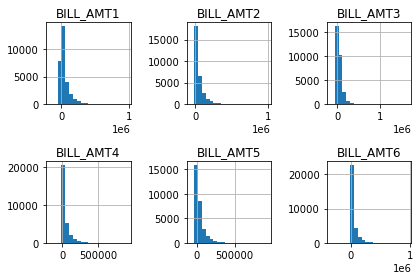

In [45]:
bills = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

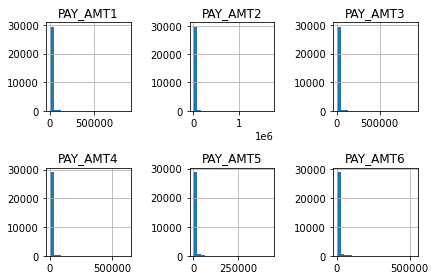

In [46]:
pay = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
          'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

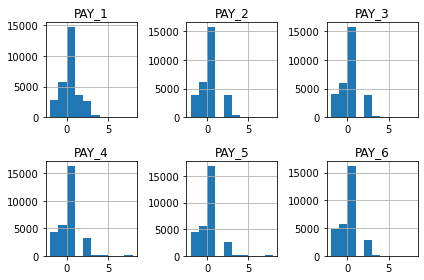

In [47]:
late = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

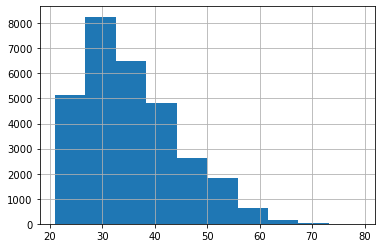

In [48]:
df.AGE.hist()

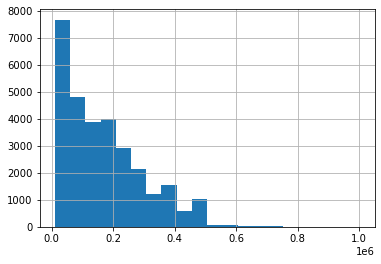

In [49]:
df.LIMIT_BAL.hist(bins=20)

In [50]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [51]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

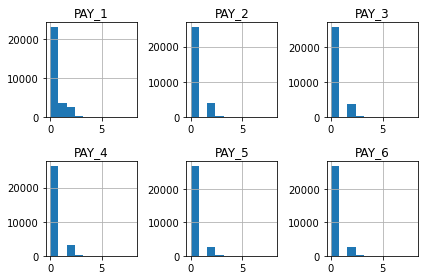

In [52]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [53]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2',
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [54]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3',
                          'PAY_AMT2', 'BILL_AMT2', 'def_pay']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_pay
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


In [55]:
pd.crosstab(df.SEX, df.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [56]:
df[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


In [57]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]] /
                   (res[res.columns[0]] + res[res.columns[1]]))
    return res

In [127]:
df.groupby(['SEX', 'def_pay']).size().unstack()

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [121]:
corr_2_cols('SEX', 'def_pay')

def_pay,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [59]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [60]:
df['SE_MA'] = df.SEX * df.MARRIAGE
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In [61]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)), 'SE_MA_2'] = 1  # Married male
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)), 'SE_MA_2'] = 2  # Single male
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)), 'SE_MA_2'] = 3
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)), 'SE_MA_2'] = 4
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)), 'SE_MA_2'] = 5
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)), 'SE_MA_2'] = 6
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


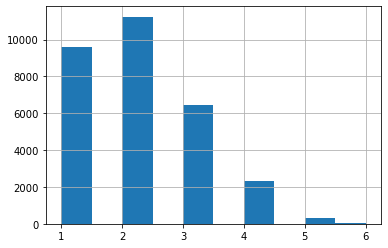

In [62]:
df['AgeBin'] = 0  # creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)), 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)), 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)), 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)), 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)), 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)), 'AgeBin'] = 6
df.AgeBin.hist()

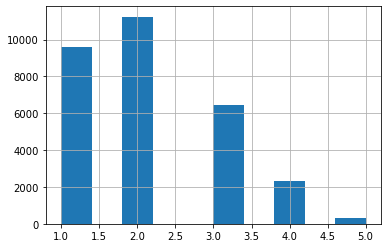

In [63]:
df.loc[(df['AgeBin'] == 6), 'AgeBin'] = 5
df.AgeBin.hist()

In [64]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,243,96,0.283186


In [65]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)), 'SE_AG'] = 1  # man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)), 'SE_AG'] = 2  # man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)), 'SE_AG'] = 3  # man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)), 'SE_AG'] = 4  # man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)),
       'SE_AG'] = 5  # man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)), 'SE_AG'] = 6  # woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)), 'SE_AG'] = 7  # woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)), 'SE_AG'] = 8  # woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)), 'SE_AG'] = 9  # woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)),
       'SE_AG'] = 10  # woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,131,48,0.268156
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001
9,962,287,0.229784


In [66]:
df['Proximity_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Proximity_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Proximity_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Proximity_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Proximity_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Proximity_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Proximity_6', 'Proximity_5', 'Proximity_4', 'Proximity_3', 'Proximity_2',
    'Proximity_1', 'def_pay']].sample(20)

,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
16221,0.504000,0.236325,0.182125,0.102725,0.027137,0.053750,0
7378,0.910869,0.918362,0.809935,0.699092,0.682227,0.655623,0
16964,0.797500,0.709335,0.640355,0.648065,0.659505,0.669940,0
8791,0.408440,1.014220,0.417260,0.424920,0.042480,0.059280,0
8192,0.365525,0.368337,0.366975,-0.002975,0.013250,0.023200,0
21482,0.986769,0.958765,0.916071,0.904684,0.907590,0.901820,0
6834,1.000000,1.000000,1.000000,1.000000,0.979600,0.982120,0
10596,0.682160,0.688300,0.615240,0.444760,0.096880,0.021480,1
26254,0.401900,0.613967,0.048433,0.038633,0.057467,0.046000,0
20110,0.996691,0.998636,0.998636,1.000000,1.000000,0.997105,1


In [67]:
from sklearn.model_selection import train_test_split
X = df.drop(['def_pay', 'ID'], axis=1)
y = df['def_pay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('confusion matrix-train\n', confusion_matrix(y_pred, y_test))
cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores), 4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores), 4)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7784444444444445
confusion matrix-train
 [[7005 1990]
 [   4    1]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.20      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.49      0.50      0.44      9000
weighted avg       0.65      0.78      0.68      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0002


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,SE_MA_2,AgeBin,SE_AG,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
2307,30000.0,2,1,2,30,1,0,0,0,0,...,5,2,7,0.967333,0.934833,0.855933,0.833667,1.000000,1.000000,0
3781,430000.0,2,1,1,48,0,0,0,0,0,...,4,3,8,0.994653,1.000000,1.000000,1.000000,1.000000,0.976977,0
18287,480000.0,1,2,1,58,0,0,0,0,0,...,1,4,4,0.170135,0.021896,0.027646,0.009356,0.016517,0.020188,0
26641,80000.0,1,1,2,23,0,0,0,0,0,...,2,1,1,0.994450,0.988900,0.988900,0.994450,0.994450,0.994450,0
14278,50000.0,2,4,1,33,2,0,0,2,0,...,4,2,7,0.456580,0.485160,0.496140,0.476180,0.491200,0.502200,1
10083,30000.0,2,2,2,23,2,2,2,0,0,...,5,1,6,0.207433,0.217333,0.266400,0.319533,0.298333,0.344200,0
8991,80000.0,2,2,1,39,1,2,0,0,0,...,4,2,7,0.953187,0.934813,0.974187,0.576375,0.563362,0.512675,1
24475,420000.0,1,2,1,32,0,0,2,2,0,...,1,2,2,1.000000,1.000000,1.000000,0.998095,0.949048,0.514660,0
16956,270000.0,1,1,1,50,2,4,3,3,2,...,1,4,4,0.143189,0.250393,0.232496,0.214600,0.226726,0.208830,0
3178,10000.0,1,1,2,24,2,0,0,0,0,...,2,1,1,0.058500,-0.009600,0.073300,0.042000,0.171300,0.244600,1


In [71]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.def_pay == 0]
df_minority = df_train[df_train.def_pay == 1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: def_pay, dtype: int64


In [72]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=16355,    # to match majority class
                                 random_state=587)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1    16355
0    16355
Name: def_pay, dtype: int64

In [73]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=4645,     # to match minority class
                                   random_state=24)  # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

1    4645
0    4645
Name: def_pay, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

32710
16355
1    16355
0    16355
Name: def_pay, dtype: int64


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [49]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000],  # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight': ['balanced'], 'n_jobs': [-1]}  # use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(),
                           param_grid, scoring=acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

CPU times: user 2min 41s, sys: 36.6 s, total: 3min 17s
Wall time: 4min 21s
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=1000, n_jobs=-1)
0.46848381236110204


In [76]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                       criterion='entropy', max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                                       min_impurity_split=None, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=-1, oob_score=False,
                                       random_state=None, verbose=0, warm_start=False)

In [77]:
y_upsampled = df_upsampled.def_pay
X_upsampled = df_upsampled.drop(['def_pay'], axis=1)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs': [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(),
                           param_grid, scoring=acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

In [78]:
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto', max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                                          oob_score=False, random_state=None, verbose=0,
                                          warm_start=False)

In [79]:
y_downsampled = df_downsampled.def_pay
X_downsampled = df_downsampled.drop(['def_pay'], axis=1)

In [52]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_downsampled = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


CPU times: user 45.7 s, sys: 19.6 s, total: 1min 5s
Wall time: 1min 52s
RandomForestClassifier(n_estimators=400, n_jobs=-1)
0.6817315604506027


In [80]:
forest_downsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=2,
                                            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
                                            oob_score=False, random_state=None, verbose=0,
                                            warm_start=False)

In [69]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.0min finished


CPU times: user 1min 26s, sys: 1.25 s, total: 1min 28s
Wall time: 7min 30s
RandomForestClassifier(n_estimators=1000)
0.8516040412828133


In [70]:
print(grid_forest.best_estimator_)

RandomForestClassifier(n_estimators=1000)


In [81]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                                      oob_score=False, random_state=None, verbose=0,
                                      warm_start=False)

In [72]:
# Adaboost

# normal training set
param_grid = {'n_estimators': [200, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()),
                        param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x7f8ff87673d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", li

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [82]:
ada_normal = AdaBoostClassifier(algorithm='SAMME',
                                base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                                                                      max_depth=None, max_features=None, max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                                                      min_samples_leaf=1, min_samples_split=2,
                                                                      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                                                      splitter='best'),
                                learning_rate=0.75, n_estimators=300, random_state=None)

In [73]:
# upsampled training set
param_grid = {'n_estimators': [200, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid,
                        scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x7f8ff849f400 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", li

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [83]:
ada_upsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                   learning_rate=1.0, n_estimators=300, random_state=None)

In [ ]:
# downsampled training set
param_grid = {'n_estimators': [200, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid,
                        scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_downsampled = grid_ada.best_estimator_

In [84]:
ada_downsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                     learning_rate=1.0, n_estimators=200, random_state=None)

In [ ]:
# SMOTE training set
param_grid = {'n_estimators': [200, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid,
                        scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_SMOTE = grid_ada.best_estimator_

In [85]:
ada_SMOTE = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
                               n_estimators=200, random_state=None)

In [ ]:
# Gradient Boosting

# normal training set
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

In [86]:
gbc_normal = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                        learning_rate=0.5, loss='deviance', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=200,
                                        presort='auto', random_state=None, subsample=1.0, verbose=0,
                                        warm_start=False)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

In [87]:
gbc_upsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                           learning_rate=1.0, loss='deviance', max_depth=3,
                                           max_features=None, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, n_estimators=300,
                                           presort='auto', random_state=None, subsample=1.0, verbose=0,
                                           warm_start=False)

In [ ]:
# downsampled training set
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_

In [88]:
gbc_downsampled = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                             learning_rate=0.5, loss='deviance', max_depth=3,
                                             max_features=None, max_leaf_nodes=None,
                                             min_impurity_decrease=0.0, min_impurity_split=None,
                                             min_samples_leaf=1, min_samples_split=2,
                                             min_weight_fraction_leaf=0.0, n_estimators=300,
                                             presort='auto', random_state=None, subsample=1.0, verbose=0,
                                             warm_start=False)

In [ ]:
# SMOTE training set
param_grid = {'n_estimators': [200, 300],
              'learning_rate': [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(
), param_grid, scoring=acc_scorer, cv=5, verbose=1, n_jobs=-1)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

In [89]:
gbc_SMOTE = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                       learning_rate=0.5, loss='deviance', max_depth=3,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, n_estimators=200,
                                       presort='auto', random_state=None, subsample=1.0, verbose=0,
                                       warm_start=False)

In [128]:
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true=y_test, y_pred=predictions), 3)))
print("Accuracy: {}".format(
    round(accuracy_score(y_true=y_test, y_pred=predictions), 3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP), 2)))
print('Recall: {}'.format(round(TP/(TP+FN), 2)))

CPU times: user 1min 47s, sys: 1.59 s, total: 1min 49s
Wall time: 18.5 s
-------------
f1 score: 0.453
Accuracy: 0.812
-------------
True Positives: 698
False Positive: 396
True Negative: 6613
False Negative: 1293
Precision: 0.64
Recall: 0.35


In [135]:
# Upsample training
%time gbc_upsampled.fit(X_upsampled, y_upsampled)
predictions = gbc_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true=y_test, y_pred=predictions), 3)))
print("Accuracy: {}".format(
    round(accuracy_score(y_true=y_test, y_pred=predictions), 3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP), 2)))
print('Recall: {}'.format(round(TP/(TP+FN), 2)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


CPU times: user 44.9 s, sys: 581 ms, total: 45.5 s
Wall time: 46.2 s
-------------
f1 score: 0.471
Accuracy: 0.736
-------------
True Positives: 1056
False Positive: 1440
True Negative: 5569
False Negative: 935
Precision: 0.42
Recall: 0.53


In [138]:
# Downsample training
%time xgb_downsampled.fit(X_downsampled, y_downsampled)
predictions = xgb_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true=y_test, y_pred=predictions), 3)))
print("Accuracy: {}".format(
    round(accuracy_score(y_true=y_test, y_pred=predictions), 3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP), 2)))
print('Recall: {}'.format(round(TP/(TP+FN), 2)))

CPU times: user 3.77 s, sys: 153 ms, total: 3.93 s
Wall time: 673 ms
-------------
f1 score: 0.529
Accuracy: 0.746
-------------
True Positives: 1283
False Positive: 1579
True Negative: 5430
False Negative: 708
Precision: 0.45
Recall: 0.64


In [137]:
# SMOTE training
%time gbc_SMOTE.fit(X_SMOTE, y_SMOTE)
predictions = gbc_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true=y_test, y_pred=predictions), 3)))
print("Accuracy: {}".format(
    round(accuracy_score(y_true=y_test, y_pred=predictions), 3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP), 2)))
print('Recall: {}'.format(round(TP/(TP+FN), 2)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


CPU times: user 35.5 s, sys: 360 ms, total: 35.8 s
Wall time: 36.2 s
-------------
f1 score: 0.489
Accuracy: 0.788
-------------
True Positives: 913
False Positive: 833
True Negative: 6176
False Negative: 1078
Precision: 0.52
Recall: 0.46


In [105]:
def hyperParameterTuning(X_downsampled, y_downsampled):
    param_tuning = {
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7, 10],
        # 'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators': [100, 200, 500],
    }

    xgb_model = XGBClassifier()
    acc_scorer = make_scorer(f1_score)

    gsearch = GridSearchCV(estimator=xgb_model,
                           param_grid=param_tuning,
                           scoring=acc_scorer,
                           cv=5,
                           verbose=2,
                           n_jobs=-1
                           )

    gsearch.fit(X_downsampled, y_downsampled)

    return gsearch.best_params_

In [106]:
hyperParameterTuning(X_downsampled, y_downsampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=

[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.

[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1, total=   1.9s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1, total=   2.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1, total=   2.1s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1, total=   1.9s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1, total=   1.7s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5 
[CV]  colsamp

[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.7, total=   2.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.6s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.1s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV] 

[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.5, total=   3.0s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.5, total=   3.6s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   3.2s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   3.6s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   3.3s
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=500, 

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   1.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   1.7s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   2.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7, total=   1.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.7, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.7, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1 
[

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.8s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=1, total=   2.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5 
[CV]  

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   4.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   4.4s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.7, total=   4.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1, total=   4.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1, total=   4.7s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsampl

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.5, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7, total=   1.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7, total=   1.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7, total=   1.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7, total=   1.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   2.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   2.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   1.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5, total=   1.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5, total=   2.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5, total=   2.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5, total=   2.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=0.5 
[CV]  colsa

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.9s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.8s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5 
[CV]  colsamp

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1 
[CV]  colsample

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.5, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   1.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.5, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7, total=   1.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7 
[CV] 

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5, total=   1.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5, total=   1.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5, total=   1.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.5 
[

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 23.1min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1}

In [114]:
xgb_downsampled = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=1)

In [123]:
list(X_downsampled.columns.values.tolist())

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SE_MA',
 'SE_MA_2',
 'AgeBin',
 'SE_AG',
 'Proximity_6',
 'Proximity_5',
 'Proximity_4',
 'Proximity_3',
 'Proximity_2',
 'Proximity_1']

In [139]:
importances = gbc_downsampled.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_downsampled.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_downsampled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.275345)
2. feature 18 (0.049596)
3. feature 11 (0.046927)
4. feature 31 (0.045251)
5. feature 30 (0.042255)
6. feature 27 (0.039963)
7. feature 19 (0.039010)
8. feature 32 (0.037263)
9. feature 20 (0.035327)
10. feature 21 (0.029493)
11. feature 29 (0.029264)
12. feature 0 (0.028963)
13. feature 16 (0.027834)
14. feature 6 (0.026599)
15. feature 22 (0.026596)
16. feature 13 (0.024620)
17. feature 17 (0.023929)
18. feature 12 (0.022183)
19. feature 14 (0.021914)
20. feature 15 (0.020918)
21. feature 4 (0.020529)
22. feature 28 (0.020154)
23. feature 8 (0.019380)
24. feature 9 (0.011456)
25. feature 26 (0.009640)
26. feature 2 (0.008629)
27. feature 7 (0.005412)
28. feature 10 (0.004889)
29. feature 23 (0.003914)
30. feature 3 (0.001131)
31. feature 25 (0.000919)
32. feature 24 (0.000640)
33. feature 1 (0.000054)
